In [1]:
using LinearAlgebra
using Plots

In [2]:
function make_K(n:: Int, alfa:: Float64, beta:: Float64, h:: Float64)
    K = zeros(n, n) 
    for i in 1:n-1
        K[i, i] = 2*(alfa/h + beta*h/3)
        K[i, i+1] = -alfa/h + beta*h/6
        K[i+1, i] = -alfa/h + beta*h/6
    end
    K[n, n] = 2*(alfa/h + beta*h/3)
    return K
end

make_K (generic function with 1 method)

In [24]:
function u(x)
    return -4*x*(x-1)
end

function calculate_error(uh::Array{Float64}, h::Float64)
    u_values = u.(h:h:1-h)
    return maximum(abs.(u_values - uh))
end

calculate_error (generic function with 1 method)

In [4]:
function f(x:: Float64)
    return 8
end

function make_F(h:: Float64, n:: Int)
    F = zeros(n)
    for i in 1:n
        F[i] = 8*h
    end
    return F
end

make_F (generic function with 1 method)

In [26]:
alfa::Float64 = 1
beta::Float64 = 0

errors = zeros(9)

for i in 2:10
    n = 2^i - 1
    h::Float64 = 1/(n+1)

    K = make_K(n, alfa, beta, h)
    F = make_F(h, n)

    C = K\F

    errors[i-1] = calculate_error(C, h)
end

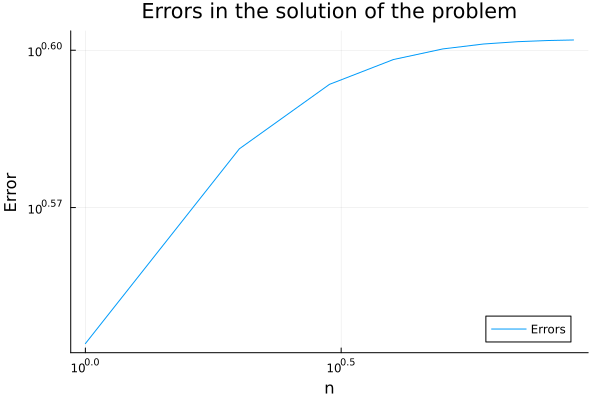

In [27]:
Plots.plot(errors, yscale=:log10, xscale=:log10, label="Errors", xlabel="n", ylabel="Error", title="Errors in the solution of the problem")

In [28]:
errors

9-element Vector{Float64}:
 3.5
 3.8125
 3.921875
 3.9648437499999996
 3.9833984375
 3.9919433593749996
 3.9960327148437504
 3.9980316162109375
 3.9990196228027344